In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [3]:
rules_df = pd.read_csv('quiz12.txt', skiprows=2, names=['input'])
rules_df
rules = dict()
for i in range(len(rules_df)):
    parse = rules_df['input'][i].split('=>')
    rules[parse[0].replace(' ','')] = parse[1].replace(' ','')

    
initial_state = '.......##..#..##....#..#..#..##.#.###.######..#..###.#.#..##.###.#.##..###..#.#..#.##.##..###.#.#...#.##.....'

count = 0
new_initial_state = ''

previous_states=set()
import time
start = time.time()

while count<20:
    #print(count, initial_state)
    new_initial_state = ''
    for i in range(len(initial_state)):
        if i<2 or i>len(initial_state)-3:
            new_initial_state = new_initial_state+initial_state[i]
        else:
            config = initial_state[i-2:i+3]
            #print(str(config))
            if str(config) in rules.keys():
                new_initial_state = new_initial_state+rules[config]
            else:
                new_initial_state = new_initial_state+initial_state[i]
   
    initial_state = new_initial_state+'.....'
#     if has_been_seen(initial_state, previous_states):
#         print(count)
#         break
#     else:
    previous_states.add(initial_state)

    count+=1

print(time.time()-start)
plants = np.zeros(len(initial_state))
for i in range(len(initial_state)):
    if initial_state[i]=='#':
        #print(i)
        plants[i] = i-7
    
print(sum(plants))


0.003329038619995117
3793.0


## part 2

In [11]:
def get_sum(initial_state):
    plants = np.zeros(len(initial_state))
    for i in range(len(initial_state)):
        if initial_state[i]=='#':
            #print(i)
            plants[i] = i-7
    return sum(plants)

In [12]:
rules_df = pd.read_csv('quiz12.txt', skiprows=2, names=['input'])
rules_df
rules = dict()
for i in range(len(rules_df)):
    parse = rules_df['input'][i].split('=>')
    rules[parse[0].replace(' ','')] = parse[1].replace(' ','')

    
initial_state = '.......##..#..##....#..#..#..##.#.###.######..#..###.#.#..##.###.#.##..###..#.#..#.##.##..###.#.#...#.##.....'

count = 0
new_initial_state = ''

previous_states=set([initial_state])
import time
start = time.time()

df_sums = pd.DataFrame(columns=['generation', 'sum'])

while count<2000:
    df_sums.loc[count] = [count, get_sum(initial_state)]
    new_initial_state = ''
    for i in range(len(initial_state)):
        if i<2 or i>len(initial_state)-3:
            new_initial_state = new_initial_state+initial_state[i]
        else:
            config = initial_state[i-2:i+3]
            #print(str(config))
            if str(config) in rules.keys():
                new_initial_state = new_initial_state+rules[config]
            else:
                new_initial_state = new_initial_state+initial_state[i]
   
    initial_state = new_initial_state+'.....'
   

    count+=1

In [24]:
df_sums

generation       sum   diff
0            0.0    2565.0    NaN
1            1.0    2700.0  135.0
2            2.0    2523.0 -177.0
3            3.0    2405.0 -118.0
4            4.0    2644.0  239.0
5            5.0    3146.0  502.0
6            6.0    3095.0  -51.0
7            7.0    2856.0 -239.0
8            8.0    3005.0  149.0
9            9.0    3339.0  334.0
10          10.0    3386.0   47.0
11          11.0    3167.0 -219.0
12          12.0    3208.0   41.0
13          13.0    3631.0  423.0
14          14.0    3701.0   70.0
15          15.0    3469.0 -232.0
16          16.0    3522.0   53.0
17          17.0    3928.0  406.0
18          18.0    4014.0   86.0
19          19.0    3698.0 -316.0
20          20.0    3793.0   95.0
21          21.0    4235.0  442.0
22          22.0    4254.0   19.0
23          23.0    3982.0 -272.0
24          24.0    4089.0  107.0
25          25.0    4506.0  417.0
26          26.0    4556.0   50.0
27          27.0    4267.0 -289.0
28          28.0    4363.0   96.0
29          29.0    4785.0  422.0
...          ...       ...    ...
1970      1970.0  171834.0   86.0
1971      1971.0  171920.0   86.0
1972      1972.0  172006.0   86.0
1973      1973.0  172092.0   86.0
1974      1974.0  172178.0   86.0
1975      1975.0  172264.0   86.0
1976      1976.0  172350.0   86.0
1977      1977.0  172436.0   86.0
1978      1978.0  172522.0   86.0
1979      1979.0  172608.0   86.0
1980      1980.0  172694.0   86.0
1981      1981.0  172780.0   86.0
1982      1982.0  172866.0   86.0
1983      1983.0  172952.0   86.0
1984      1984.0  173038.0   86.0
1985      1985.0  173124.0   86.0
1986      1986.0  173210.0   86.0
1987      1987.0  173296.0   86.0
1988      1988.0  173382.0   86.0
1989      1989.0  173468.0   86.0
1990      1990.0  173554.0   86.0
1991      1991.0  173640.0   86.0
1992      1992.0  173726.0   86.0
1993      1993.0  173812.0   86.0
1994      1994.0  173898.0   86.0
1995      1995.0  173984.0   86.0
1996      1996.0  174070.0   86.0
1997      1997.0  174156.0   86.0
1998      1998.0  174242.0   86.0
1999      1999.0  174328.0   86.0

[2000 rows x 3 columns]

In [26]:
k = 1999
m = 50000000000

x = df_sums['sum'][k]
add = 86

x+(m-k)*add


4300000002414.0

In [18]:
dif = [None]

for i in range(1,len(df_sums)):
    dif.append(df_sums['sum'][i]-df_sums['sum'][i-1])
df_sums['diff'] = dif

86.0 86.0


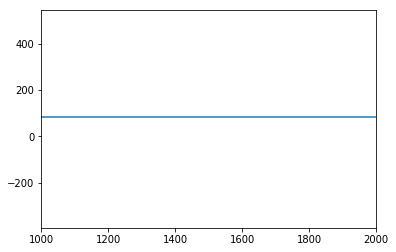

In [23]:
plt.plot(df_sums['diff'])
plt.xlim(1000,2000)
print(df_sums['diff'][1000], df_sums['diff'][2000-2])

(1750, 2000)

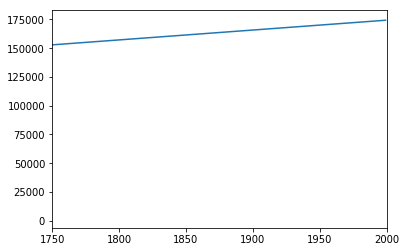

In [17]:
plt.plot(df_sums['sum'])
plt.xlim((1750, 2000))

In [2]:
def are_the_same(state1,state2):
    first_dot1 = state1.find('.')
    last_dot1 = state1.rfind('.')
    first_dot2 = state2.find('.')
    last_dot2 = state2.rfind('.')
    
    if state1[first_dot1:last_dot1] == state2[first_dot2:last_dot2]:
        return 1
    else:
        return 0
    
def is_in_set(set1, state):
    for state2 in set1:
        if are_the_same(state, state2):
            return 1
    return 0

In [8]:
rules_df = pd.read_csv('quiz12.txt', skiprows=2, names=['input'])
rules_df
rules = dict()
for i in range(len(rules_df)):
    parse = rules_df['input'][i].split('=>')
    rules[parse[0].replace(' ','')] = parse[1].replace(' ','')

    
initial_state = '.......##..#..##....#..#..#..##.#.###.######..#..###.#.#..##.###.#.##..###..#.#..#.##.##..###.#.#...#.##.....'

count = 0
new_initial_state = ''

previous_states=set([initial_state])
import time
start = time.time()

while count<10000:
    #print(count, initial_state)
    new_initial_state = ''
    for i in range(len(initial_state)):
        if i<2 or i>len(initial_state)-3:
            new_initial_state = new_initial_state+initial_state[i]
        else:
            config = initial_state[i-2:i+3]
            #print(str(config))
            if str(config) in rules.keys():
                new_initial_state = new_initial_state+rules[config]
            else:
                new_initial_state = new_initial_state+initial_state[i]
   
    initial_state = new_initial_state+'.....'
    if is_in_set(previous_states, initial_state):
        print(count)
        break
    else:
        previous_states.add(initial_state)

    count+=1

KeyboardInterrupt: 

In [7]:
len(previous_states)

1001

# test case

In [89]:
config

'.....'

In [116]:
initial_state = '.......#..#.#..##......###...###.............'
rules = dict()

rules['...##'] = '#'
rules['..#..'] = '#'
rules['.#...'] = '#'
rules['.#.#.'] = '#'
rules['.#.##'] = '#'
rules['.##..'] = '#'
rules['.####'] = '#'
rules['#.#.#'] = '#'
rules['#.###'] = '#'
rules['##.#.'] = '#'
rules['##.##'] = '#'
rules['###..'] = '#'
rules['###.#'] = '#'
rules['####.'] = '#'


count = 0
new_initial_state = ''

while count<20:
    print(count, initial_state)
    new_initial_state = ''
    for i in range(len(initial_state)):
        if i<2 or i>len(initial_state)-3:
            new_initial_state = new_initial_state+'.'
        else:
            config = initial_state[i-2:i+3]
            #print(str(config))
            if str(config) in rules.keys():
                new_initial_state = new_initial_state+rules[config]
            else:
                new_initial_state = new_initial_state+'.'
   
    initial_state = new_initial_state+'.....'
    count+=1


plants = np.zeros(len(initial_state))
for i in range(len(initial_state)):
    if initial_state[i]=='#':
        #print(i)
        plants[i] = i-7
    
print(sum(plants))

0 .......#..#.#..##......###...###.............
1 .......#...#....#.....#..#..#..#..................
2 .......##..##...##....#..#..#..##......................
3 ......#.#...#..#.#....#..#..#...#...........................
4 .......#.#..#...#.#...#..#..##..##...............................
5 ........#...##...#.#..#..#...#...#....................................
6 ........##.#.#....#...#..##..##..##........................................
7 .......#..###.#...##..#...#...#...#.............................................
8 .......#....##.#.#.#..##..##..##..##.................................................
9 .......##..#..#####....#...#...#...#......................................................
10 ......#.#..#...#.##....##..##..##..##..........................................................
11 .......#...##...#.#...#.#...#...#...#...............................................................
12 .......##.#.#....#.#...#.#..##..##..##...................................................